In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,5
plt.rcParams['figure.dpi']=300
%matplotlib inline

# Q1 →→→ANS

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()

x  = sc.fit_transform(df)

x

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [6]:
x = pd.DataFrame(x)
x

,0,1
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [7]:
x = x.rename({0 : 'delivery' , 1 : 'sorting'} , axis=1)
x

,delivery,sorting
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [8]:
M = smf.ols('delivery ~ sorting' , data = x).fit()
M.pvalues

Intercept    1.000000
sorting      0.000004
dtype: float64

In [9]:
M.rsquared , M.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [10]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
df.shape

(21, 2)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [14]:
df=df.rename({"Delivery Time": "delivery_time" , "Sorting Time" : "sorting_time"} , axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


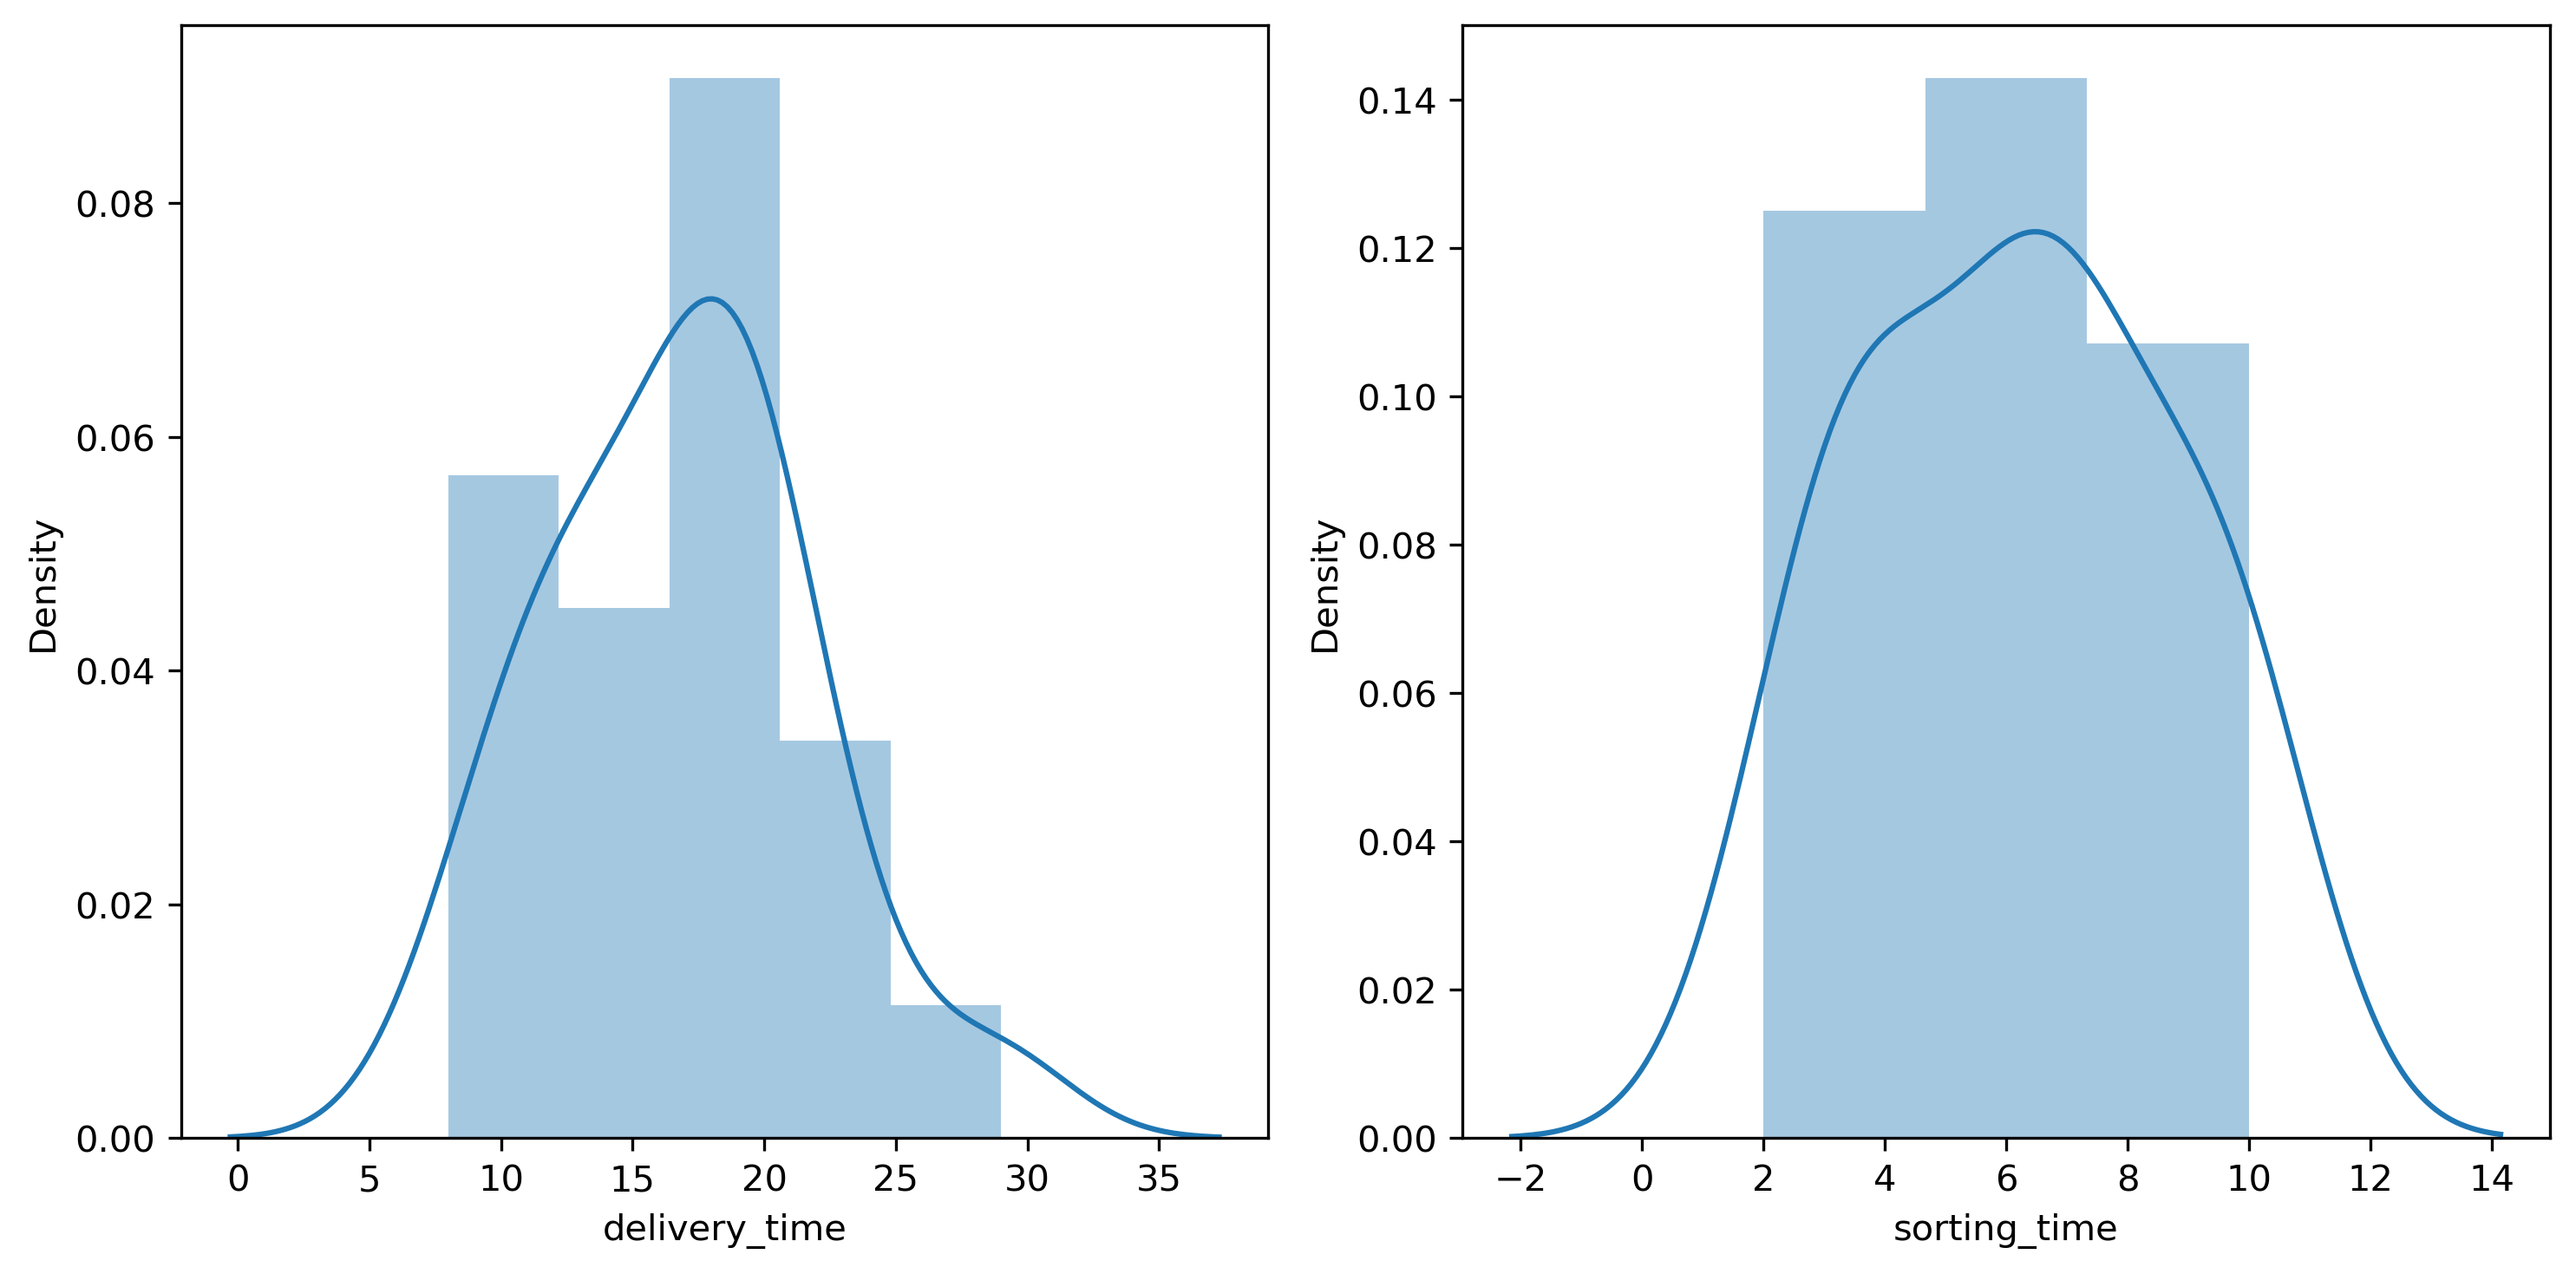

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])

plt.tight_layout()

In [16]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

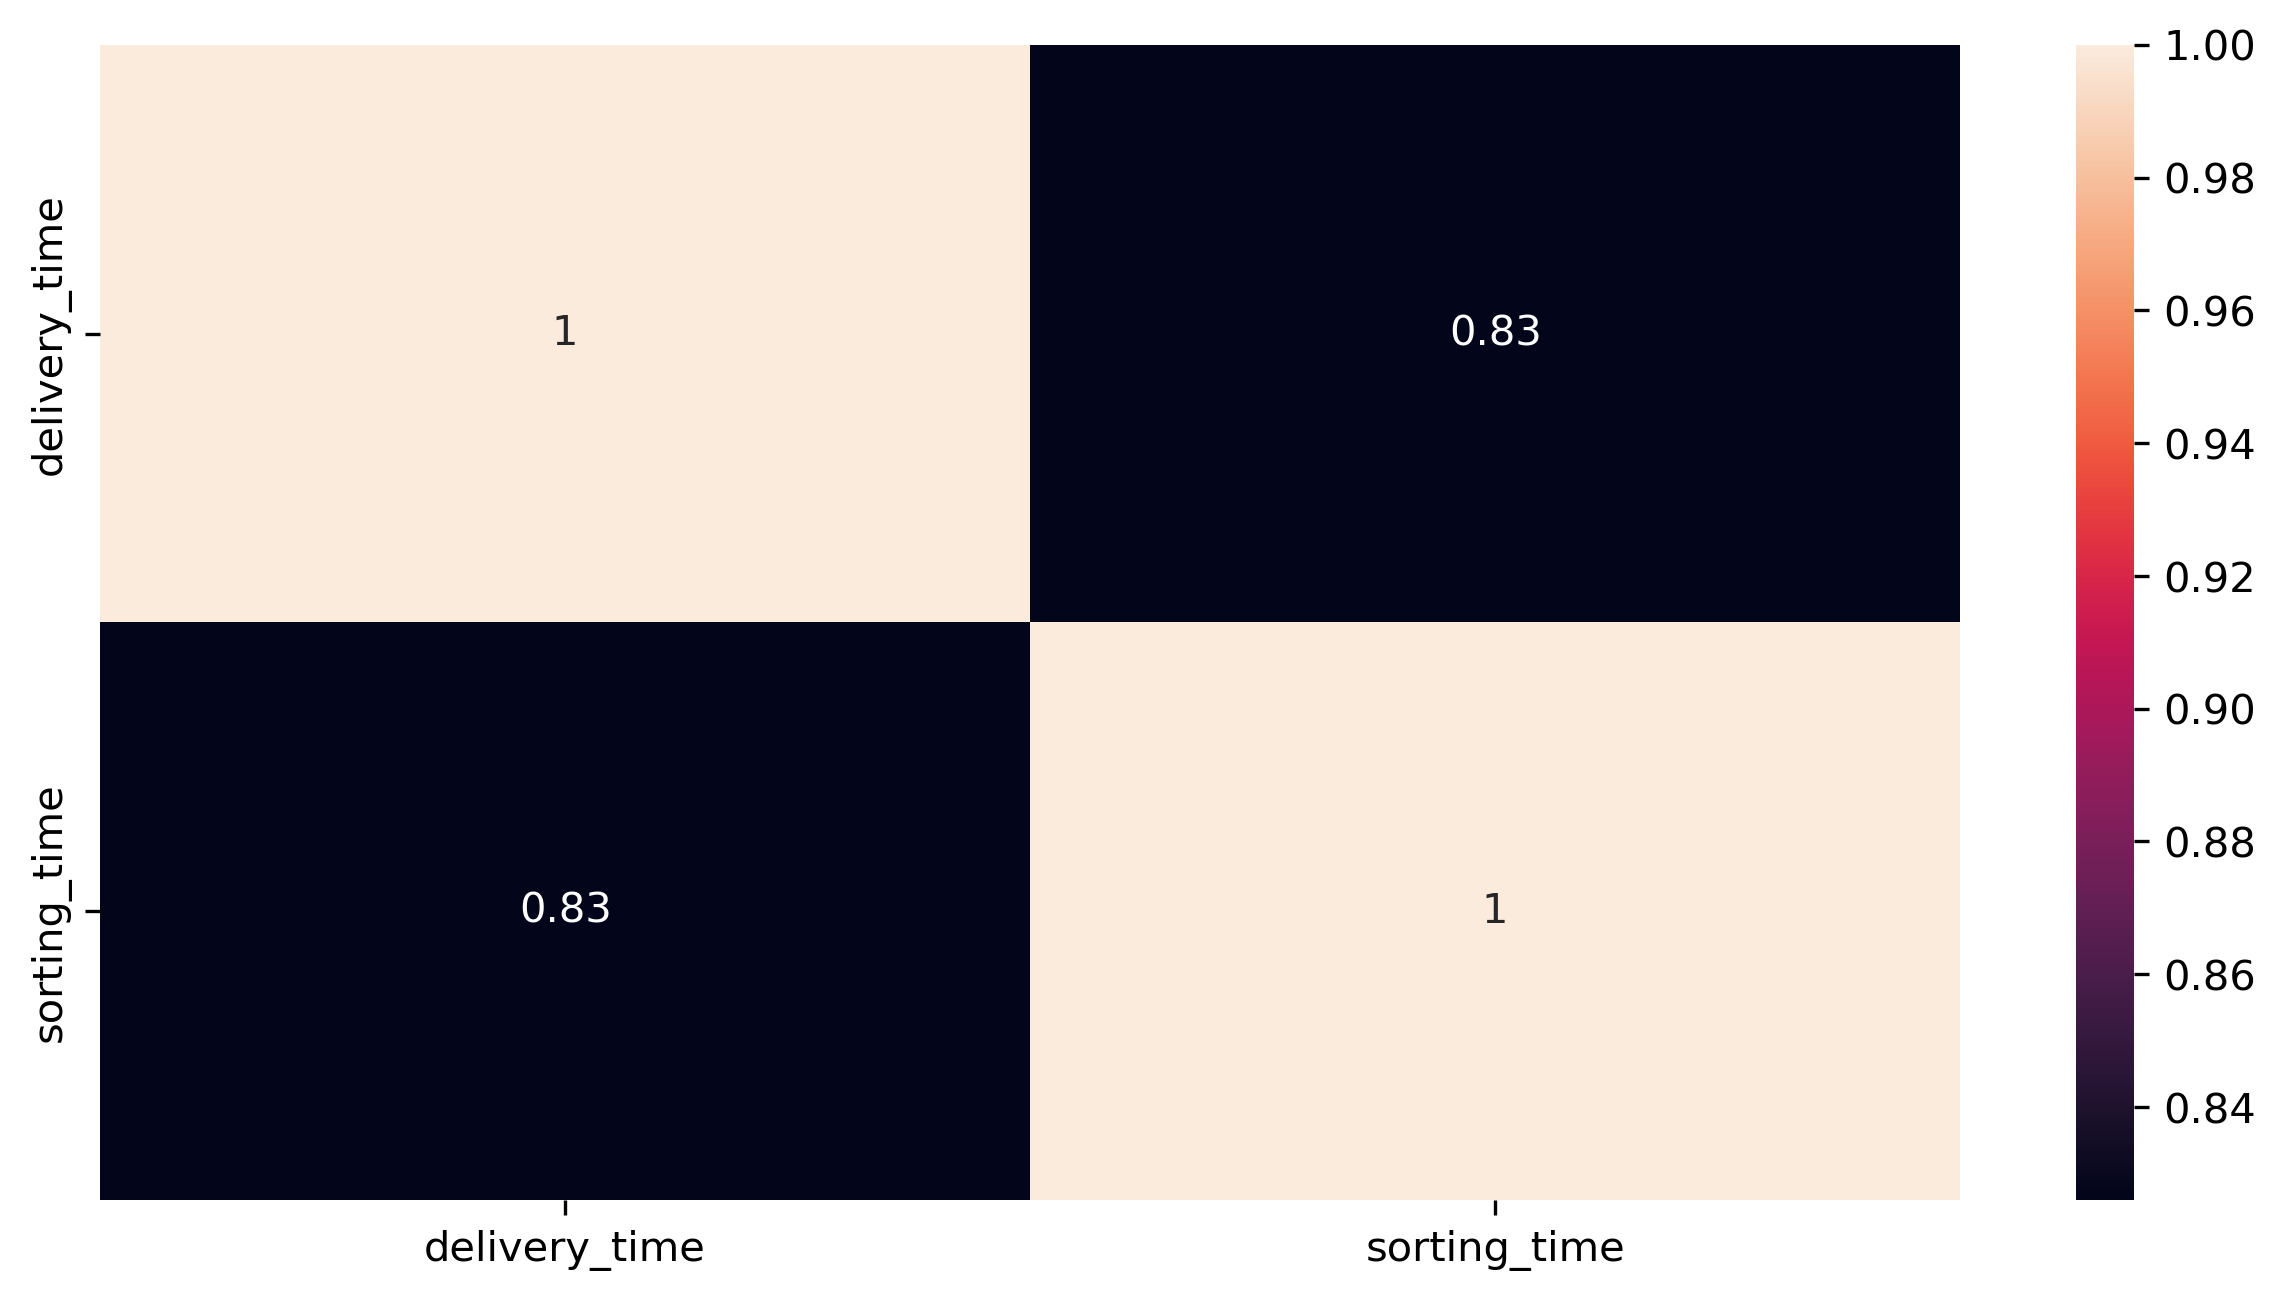

In [17]:
sns.heatmap(df.corr() , annot= True)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

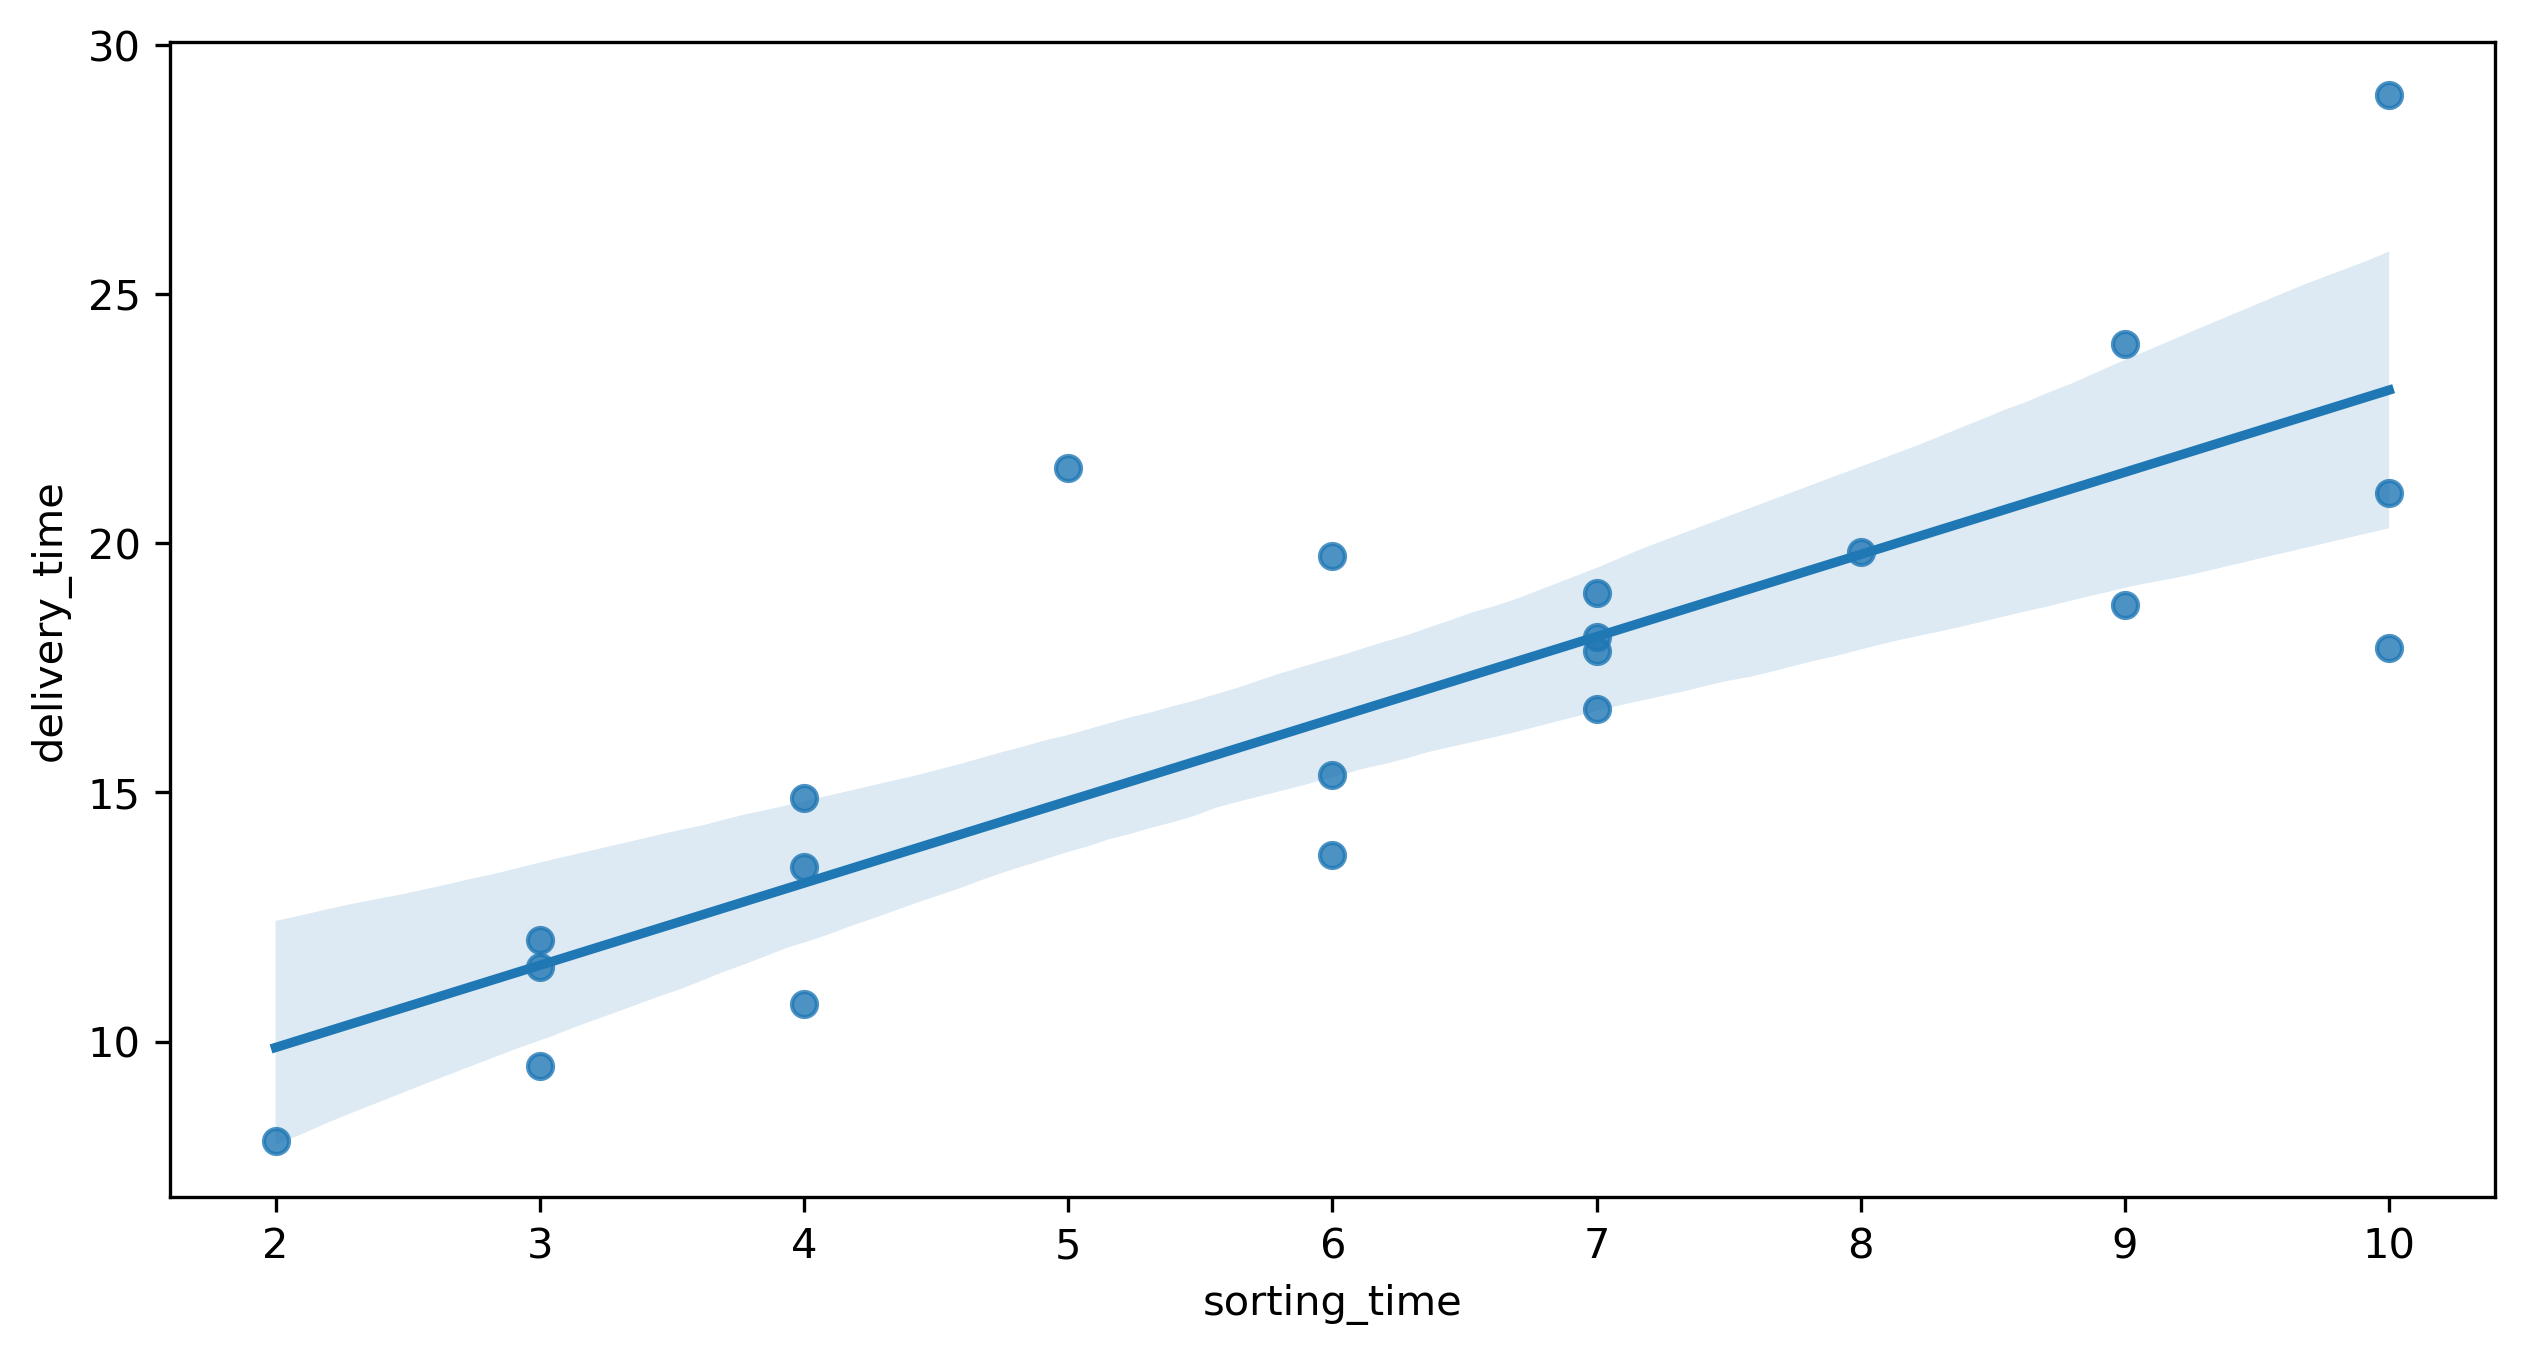

In [18]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [19]:
model = smf.ols('delivery_time ~ sorting_time' , data=df).fit()

In [20]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [22]:
delivery_time = (6.582734) + (1.649020) * (5)
delivery_time

14.827834

In [23]:
model.rsquared  , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [25]:
data_pred = pd.DataFrame(new_data , columns =['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [26]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Apply Log Transformation of Y

In [27]:
model_1 = smf.ols('delivery_time ~ np.log(sorting_time)' , data=df).fit()
model_1

In [28]:
model_1.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [29]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        15:16:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
new_d1=pd.Series([8,9])

In [31]:
data_predict_1=pd.DataFrame(new_d1,columns=['sort_time'])
data_predict_1

,sort_time
0,8
1,9


In [32]:
model_1.predict(data_pred)

0    15.714496
1    19.964933
dtype: float64

# Apply Log Transformation of X

In [33]:
model_2 = smf.ols('np.log(delivery_time) ~ sorting_time' , data=df).fit()
model_2

In [34]:
model_2.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 16 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                           15:16:13   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model_2.predict(data_pred)

0    2.649130
1    2.965785
dtype: float64

In [37]:
model_3 = smf.ols('delivery_time ~ sorting_time' , data=df).fit()
model_3

In [38]:
model_3.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        15:16:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model_3.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2 →→→ANS

In [41]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

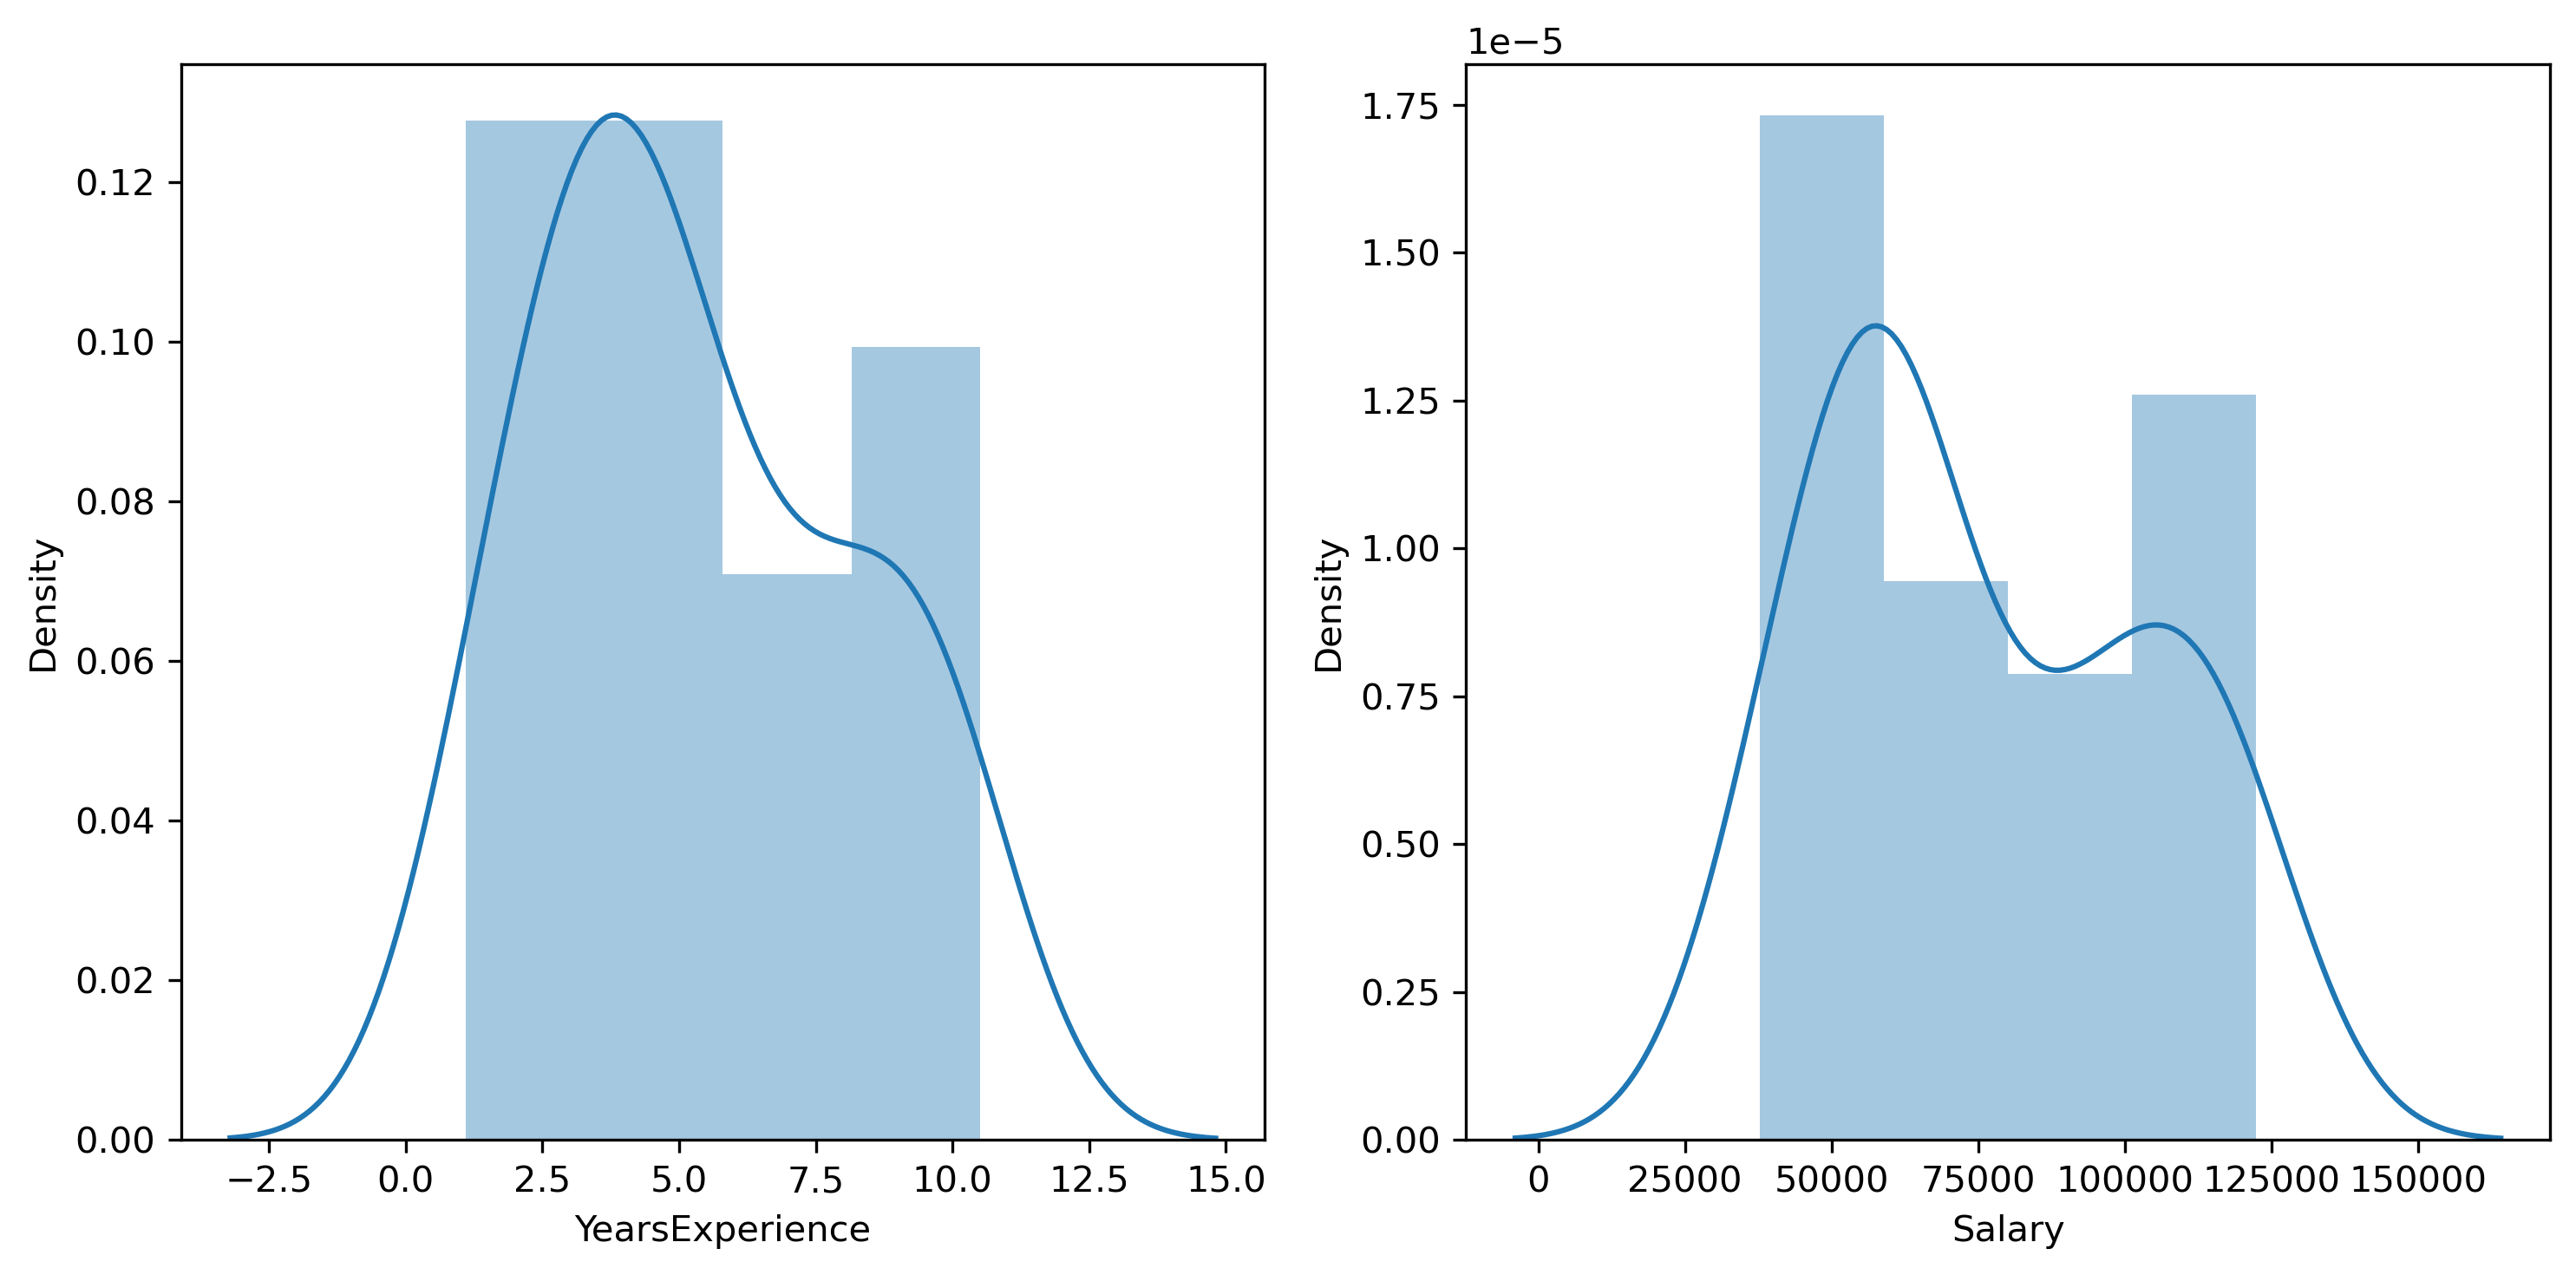

In [44]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [45]:
df = df.rename({'YearsExperience' : 'yexp' , 'Salary' : 'salary'},axis = 1)
df

,yexp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [46]:
df.corr()

,yexp,salary
yexp,1.000000,0.978242
salary,0.978242,1.000000


<Axes: >

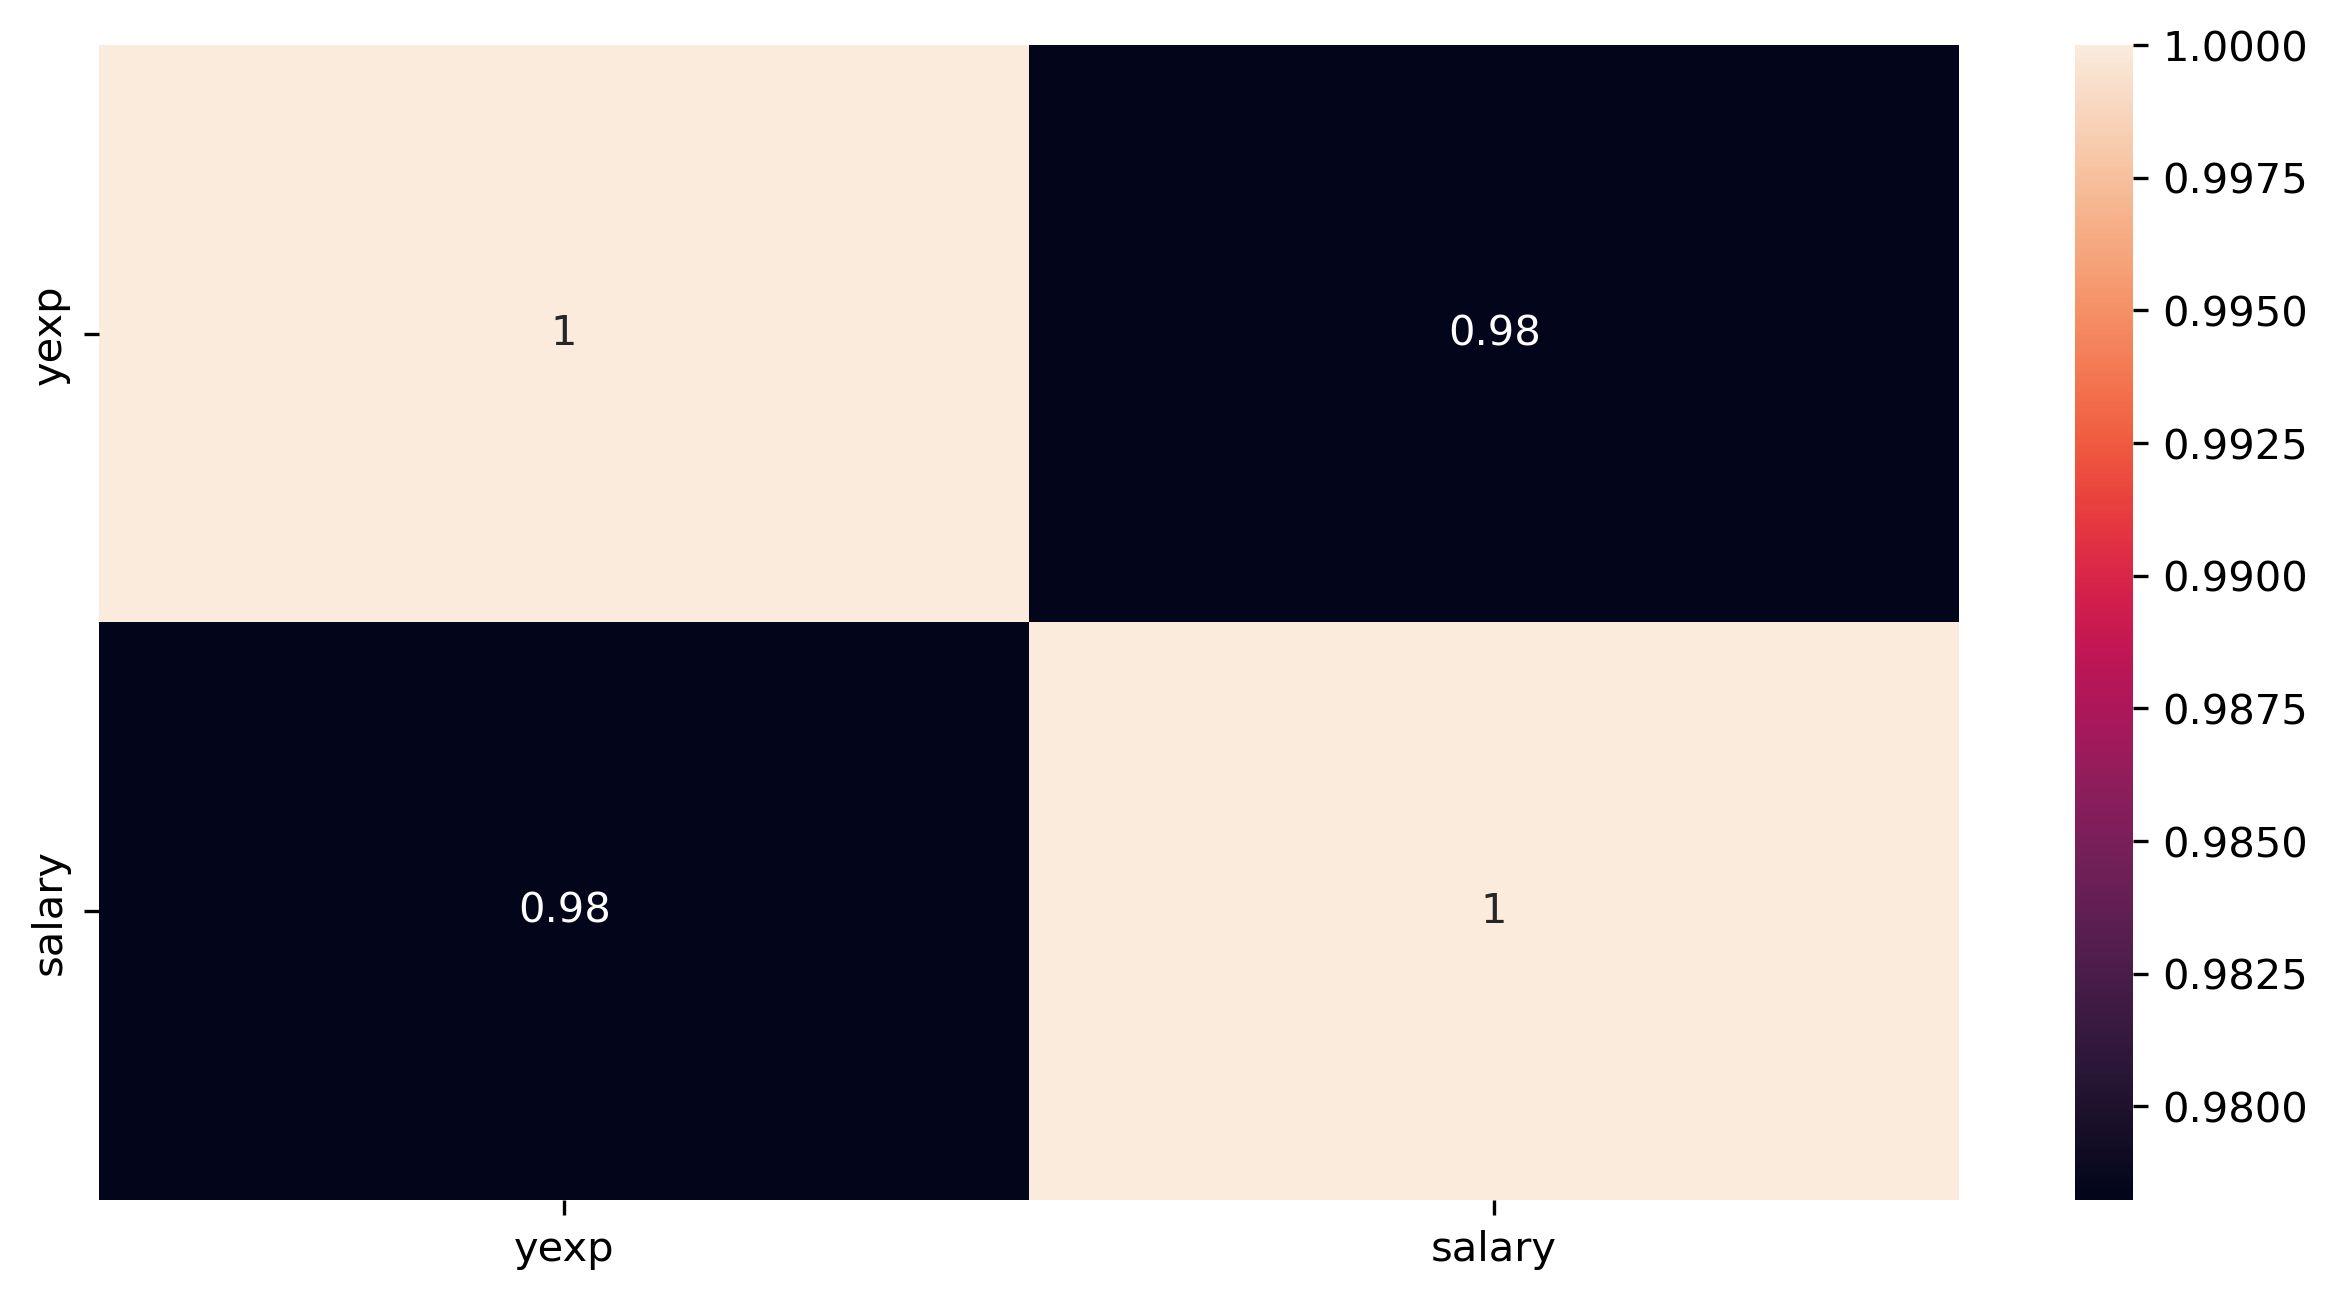

In [47]:
sns.heatmap(df.corr() , annot=True)

<Axes: xlabel='yexp', ylabel='salary'>

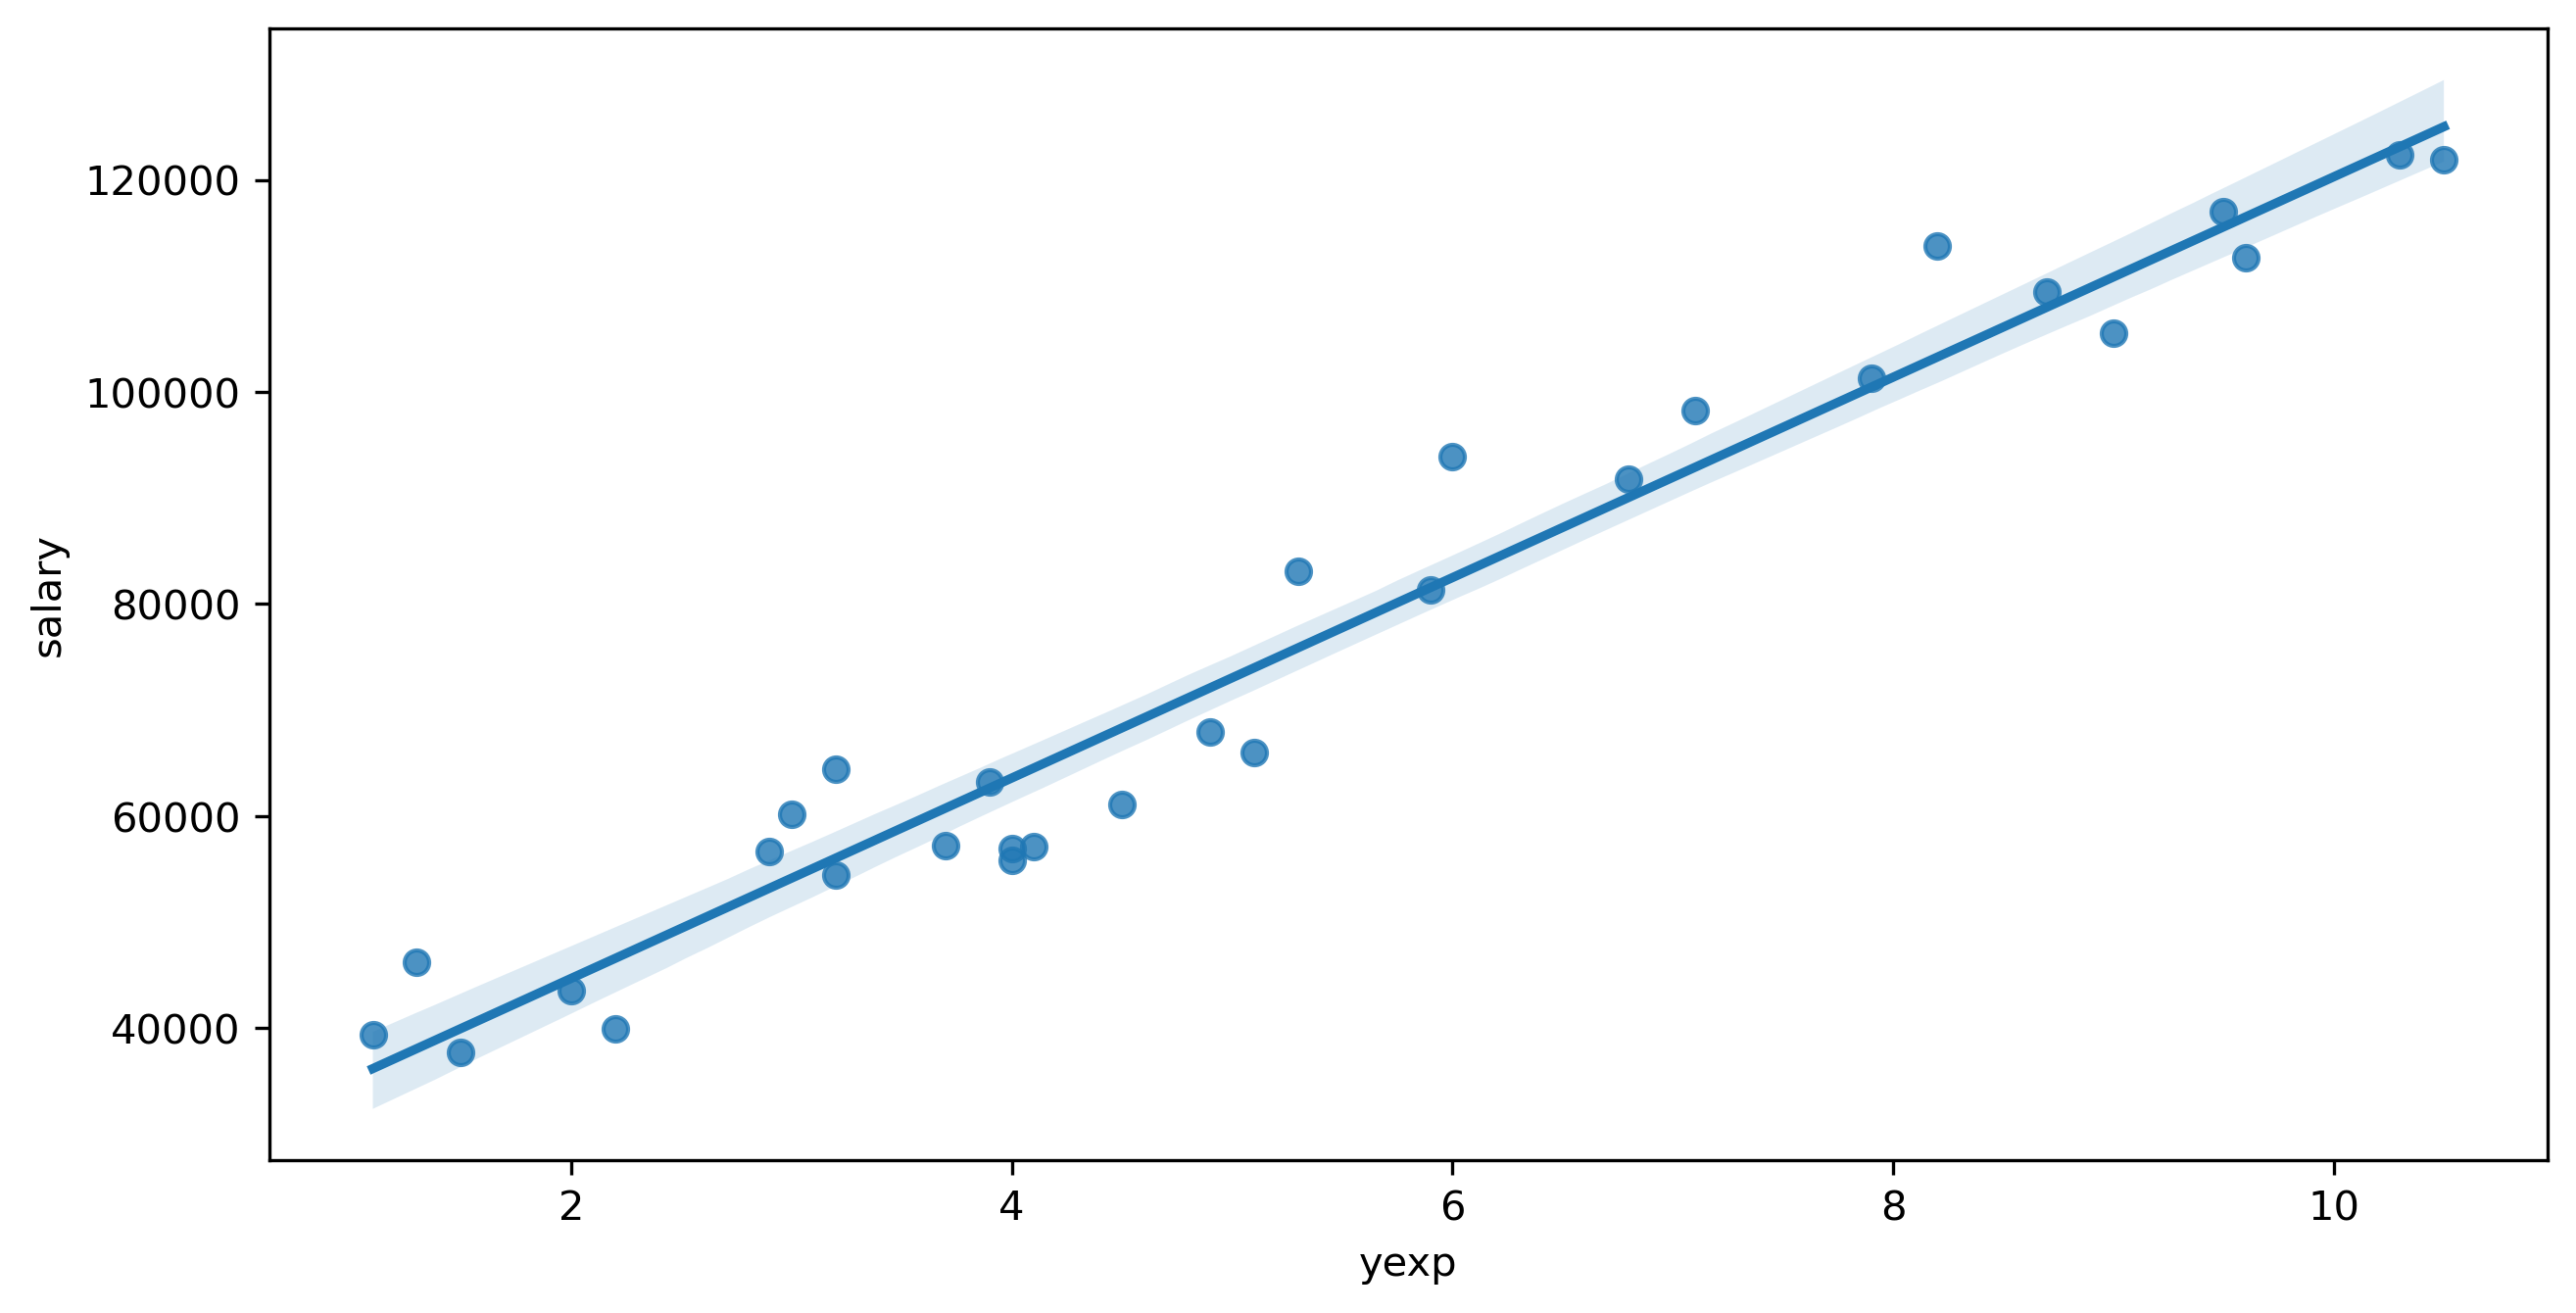

In [48]:
sns.regplot(x=df['yexp'] , y=df['salary'])

# Without Applying any Transformation

In [49]:
model = smf.ols('salary ~ yexp' , data=df).fit()

In [50]:
model.params

Intercept    25792.200199
yexp          9449.962321
dtype: float64

In [51]:
model.pvalues

Intercept    5.511950e-12
yexp         1.143068e-20
dtype: float64

In [52]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [53]:
# Manual prediction for let's say 3 years.

model_pred = 9449.96*3+25792.20
model_pred

54142.08

In [54]:
# Automatic prediction for let say 5 and 7 years.

In [55]:
test = pd.DataFrame({
    'yexp':[1,.5,2,3,3.1]
})
test

,yexp
0,1.0
1,0.5
2,2.0
3,3.0
4,3.1


In [56]:
model.predict(test)

0    35242.162520
1    30517.181359
2    44692.124842
3    54142.087163
4    55087.083395
dtype: float64

# Apply Square Transformation


In [57]:
model_4 = smf.ols('salary ~np.square(yexp)' , data=df).fit()
model_4

In [58]:
model_4.params

Intercept          48042.585515
np.square(yexp)      776.318773
dtype: float64

In [59]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.52e-16
Time:                        15:16:15   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(yexp)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model_4.predict(test)

0    48818.904288
1    48236.665208
2    51147.860608
3    55029.454474
4    55503.008926
dtype: float64

#Apply Square Root Transformation

In [61]:
model_5 = smf.ols('salary ~np.sqrt(yexp)' , data=df).fit()
model_5

In [62]:
model_5.params

Intercept       -16055.769117
np.sqrt(yexp)    41500.680583
dtype: float64

In [63]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           8.57e-18
Time:                        15:16:15   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(yexp)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model_5.predict(test)

0    25444.911466
1    13289.643547
2    42635.056211
3    55825.518202
4    57013.719149
dtype: float64